In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

In [7]:
campaign_df = pd.read_csv('FY23_AU_All_Campaigns.csv') #import campaign data from GCM360

## Exploring the Dataset

In [8]:
print(campaign_df.head())

                                            Campaign  Campaign ID  \
0  NBA League Pass Australia - All Star Weekend FY23     29401107   
1  NBA League Pass Australia - All Star Weekend FY23     29401107   
2  NBA League Pass Australia - All Star Weekend FY23     29401107   
3  NBA League Pass Australia - All Star Weekend FY23     29401107   
4  NBA League Pass Australia - All Star Weekend FY23     29401107   

   Site (CM360)                                          Placement       Date  \
0  affiperf.com  NBA League Pass Australia - All Star Weekend F...  16/2/2023   
1  affiperf.com  NBA League Pass Australia - All Star Weekend F...  16/2/2023   
2  affiperf.com  NBA League Pass Australia - All Star Weekend F...  17/2/2023   
3  affiperf.com  NBA League Pass Australia - All Star Weekend F...  17/2/2023   
4  affiperf.com  NBA League Pass Australia - All Star Weekend F...  18/2/2023   

                                  Creative  Impressions  Clicks  Click Rate  \
0  NBA_160x600_asg_

In [9]:
campaign_df.shape

(19936, 12)

In [10]:
campaign_df.columns

Index(['Campaign', 'Campaign ID', 'Site (CM360)', 'Placement', 'Date',
       'Creative', 'Impressions', 'Clicks', 'Click Rate', 'Total Conversions',
       'Click-through Conversions', 'View-through Conversions'],
      dtype='object')

In [11]:
campaign_df.dtypes

Campaign                      object
Campaign ID                    int64
Site (CM360)                  object
Placement                     object
Date                          object
Creative                      object
Impressions                    int64
Clicks                         int64
Click Rate                   float64
Total Conversions              int64
Click-through Conversions      int64
View-through Conversions       int64
dtype: object

In [12]:
campaign_df.describe()

,Campaign ID,Impressions,Clicks,Click Rate,Total Conversions,Click-through Conversions,View-through Conversions
count,1.993600e+04,19936.000000,19936.000000,19936.000000,19936.000000,19936.000000,19936.000000
mean,2.925399e+07,5496.176565,8.085624,0.124377,0.154795,0.010183,0.144613
std,4.358283e+05,16011.503489,153.118552,2.030985,0.506407,0.104797,0.483180
min,2.867510e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.902698e+07,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.902698e+07,1423.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.974293e+07,4498.250000,1.000000,0.030000,0.000000,0.000000,0.000000
max,2.974293e+07,607638.000000,10205.000000,150.000000,9.000000,2.000000,9.000000


## Data Preparation

In [13]:
campaign_df.columns

Index(['Campaign', 'Campaign ID', 'Site (CM360)', 'Placement', 'Date',
       'Creative', 'Impressions', 'Clicks', 'Click Rate', 'Total Conversions',
       'Click-through Conversions', 'View-through Conversions'],
      dtype='object')

In [14]:
campaign_df.drop(['Campaign ID'], axis=1) #we can remove campaign id since we have campaign name

,Campaign,Site (CM360),Placement,Date,Creative,Impressions,Clicks,Click Rate,Total Conversions,Click-through Conversions,View-through Conversions
0,NBA League Pass Australia - All Star Weekend FY23,affiperf.com,NBA League Pass Australia - All Star Weekend F...,16/2/2023,NBA_160x600_asg_multi_ACCESS_WATCH_HERE,27302,7,0.03,0,0,0
1,NBA League Pass Australia - All Star Weekend FY23,affiperf.com,NBA League Pass Australia - All Star Weekend F...,16/2/2023,NBA_160x600_asg_multi_STARS_WATCH_HERE,27232,8,0.03,0,0,0
2,NBA League Pass Australia - All Star Weekend FY23,affiperf.com,NBA League Pass Australia - All Star Weekend F...,17/2/2023,NBA_160x600_asg_multi_ACCESS_WATCH_HERE,40782,12,0.03,0,0,0
3,NBA League Pass Australia - All Star Weekend FY23,affiperf.com,NBA League Pass Australia - All Star Weekend F...,17/2/2023,NBA_160x600_asg_multi_STARS_WATCH_HERE,40606,4,0.01,0,0,0
4,NBA League Pass Australia - All Star Weekend FY23,affiperf.com,NBA League Pass Australia - All Star Weekend F...,18/2/2023,NBA_160x600_asg_multi_ACCESS_WATCH_HERE,54183,12,0.02,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19931,NBA League Pass Australia - Start of Season FY23,affiperf.com,NBA League Pass Australia - Start of Season FY...,29/11/2022,Tracking,9508,7,0.07,0,0,0
19932,NBA League Pass Australia - Start of Season FY23,affiperf.com,NBA League Pass Australia - Start of Season FY...,30/11/2022,Tracking,8877,6,0.07,1,0,1
19933,NBA League Pass Australia - Start of Season FY23,affiperf.com,NBA League Pass Australia - Start of Season FY...,5/12/2022,Tracking,0,0,0.00,1,0,1
19934,NBA League Pass Australia - Start of Season FY23,affiperf.com,NBA League Pass Australia - Start of Season FY...,17/12/2022,Tracking,0,0,0.00,1,0,1


In [15]:
campaign_df.isna().sum() #check for missing values

Campaign                     0
Campaign ID                  0
Site (CM360)                 0
Placement                    0
Date                         0
Creative                     0
Impressions                  0
Clicks                       0
Click Rate                   0
Total Conversions            0
Click-through Conversions    0
View-through Conversions     0
dtype: int64

In [12]:
campaign_df.loc[campaign_df.duplicated()] #check for duplicated rows

,Campaign,Campaign ID,Site (CM360),Placement,Date,Creative,Impressions,Clicks,Click Rate,Total Conversions,Click-through Conversions,View-through Conversions


## Feature Understanding

In [16]:
campaign_df_site = campaign_df.groupby('Site (CM360)')[['Impressions', 'Clicks', 'Total Conversions']].sum()

In [17]:
print(campaign_df_site.head()) #Get a quick glance of the sites ran during the campaign, impressions, clicks and converions

              Impressions  Clicks  Total Conversions
Site (CM360)                                        
QuantCast         8485382    1481                491
affiperf.com    101086394  159714               2595


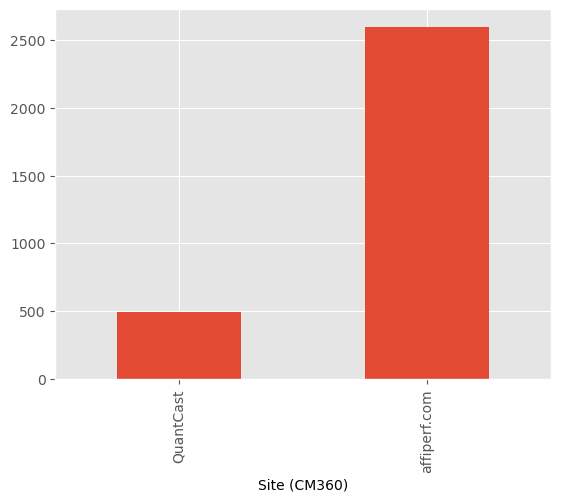

In [18]:
campaign_df_site['Total Conversions'].plot(kind='bar') #plot the total conversions by site
plt.show()

In [19]:
# we notice something strange - only two sites are being pulled into our groupby function and our plot. We definitely ran YouTube ads this year so that's weird

In [20]:
campaign_df_placement = campaign_df.groupby('Placement')[['Impressions', 'Clicks', 'Total Conversions']].sum() #let's check placement in case that gives more info to our missing youtube ads

In [21]:
campaign_df_placement.sort_values('Placement')

,Impressions,Clicks,Total Conversions
Placement,,,
NBA League Pass Australia - All Star Weekend FY23_HPH_Prospecting - Contextual_160x600,765467,201,2
NBA League Pass Australia - All Star Weekend FY23_HPH_Prospecting - Contextual_300x250,2133235,657,3
NBA League Pass Australia - All Star Weekend FY23_HPH_Prospecting - Contextual_300x600,223557,73,0
NBA League Pass Australia - All Star Weekend FY23_HPH_Prospecting - Contextual_728x90,1367242,475,1
NBA League Pass Australia - All Star Weekend FY23_HPH_Prospecting - Contextual_970x250,108200,40,1
...,...,...,...
NBA League Pass Australia - Start of Season FY23_YouTube_Prospecting - Contextual_TrueView,522290,1217,16
NBA League Pass Australia - Start of Season FY23_YouTube_Prospecting - Look-a-like_Bumper,7431,5,0
NBA League Pass Australia - Start of Season FY23_YouTube_Prospecting - Look-a-like_TrueView,652204,580,73


In [19]:
#so youtube ads placement ran under the same site as all DV360 display ads, which makes sense, but we want to portion them out

In [22]:
campaign_df_is_YouTube = campaign_df[campaign_df['Placement'].str.contains('YouTube')] #filter placements for YouTube

In [23]:
campaign_df_is_YouTube

,Campaign,Campaign ID,Site (CM360),Placement,Date,Creative,Impressions,Clicks,Click Rate,Total Conversions,Click-through Conversions,View-through Conversions
7332,NBA League Pass Australia - Always On FY23,29026983,affiperf.com,NBA League Pass Australia - Always On FY23_You...,1/12/2022,Tracking,986,7,0.71,0,0,0
7333,NBA League Pass Australia - Always On FY23,29026983,affiperf.com,NBA League Pass Australia - Always On FY23_You...,2/12/2022,Tracking,1233,2,0.16,0,0,0
7334,NBA League Pass Australia - Always On FY23,29026983,affiperf.com,NBA League Pass Australia - Always On FY23_You...,3/12/2022,Tracking,756,0,0.00,0,0,0
7335,NBA League Pass Australia - Always On FY23,29026983,affiperf.com,NBA League Pass Australia - Always On FY23_You...,4/12/2022,Tracking,1409,57,4.05,0,0,0
7336,NBA League Pass Australia - Always On FY23,29026983,affiperf.com,NBA League Pass Australia - Always On FY23_You...,5/12/2022,Tracking,4593,34,0.74,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19931,NBA League Pass Australia - Start of Season FY23,28675099,affiperf.com,NBA League Pass Australia - Start of Season FY...,29/11/2022,Tracking,9508,7,0.07,0,0,0
19932,NBA League Pass Australia - Start of Season FY23,28675099,affiperf.com,NBA League Pass Australia - Start of Season FY...,30/11/2022,Tracking,8877,6,0.07,1,0,1
19933,NBA League Pass Australia - Start of Season FY23,28675099,affiperf.com,NBA League Pass Australia - Start of Season FY...,5/12/2022,Tracking,0,0,0.00,1,0,1
19934,NBA League Pass Australia - Start of Season FY23,28675099,affiperf.com,NBA League Pass Australia - Start of Season FY...,17/12/2022,Tracking,0,0,0.00,1,0,1


In [24]:
campaign_df_site_youtube = campaign_df_is_YouTube.replace(to_replace='affiperf.com', value='YouTube')
#replace site name to YouTube
campaign_df_site_youtube

,Campaign,Campaign ID,Site (CM360),Placement,Date,Creative,Impressions,Clicks,Click Rate,Total Conversions,Click-through Conversions,View-through Conversions
7332,NBA League Pass Australia - Always On FY23,29026983,YouTube,NBA League Pass Australia - Always On FY23_You...,1/12/2022,Tracking,986,7,0.71,0,0,0
7333,NBA League Pass Australia - Always On FY23,29026983,YouTube,NBA League Pass Australia - Always On FY23_You...,2/12/2022,Tracking,1233,2,0.16,0,0,0
7334,NBA League Pass Australia - Always On FY23,29026983,YouTube,NBA League Pass Australia - Always On FY23_You...,3/12/2022,Tracking,756,0,0.00,0,0,0
7335,NBA League Pass Australia - Always On FY23,29026983,YouTube,NBA League Pass Australia - Always On FY23_You...,4/12/2022,Tracking,1409,57,4.05,0,0,0
7336,NBA League Pass Australia - Always On FY23,29026983,YouTube,NBA League Pass Australia - Always On FY23_You...,5/12/2022,Tracking,4593,34,0.74,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19931,NBA League Pass Australia - Start of Season FY23,28675099,YouTube,NBA League Pass Australia - Start of Season FY...,29/11/2022,Tracking,9508,7,0.07,0,0,0
19932,NBA League Pass Australia - Start of Season FY23,28675099,YouTube,NBA League Pass Australia - Start of Season FY...,30/11/2022,Tracking,8877,6,0.07,1,0,1
19933,NBA League Pass Australia - Start of Season FY23,28675099,YouTube,NBA League Pass Australia - Start of Season FY...,5/12/2022,Tracking,0,0,0.00,1,0,1
19934,NBA League Pass Australia - Start of Season FY23,28675099,YouTube,NBA League Pass Australia - Start of Season FY...,17/12/2022,Tracking,0,0,0.00,1,0,1


In [25]:
# now we need to remove the YouTube placements from the original dataframe before we join the two together to create the cleaned df

In [26]:
campaign_df.drop(campaign_df[campaign_df['Placement'].str.contains('YouTube')].index, inplace=True)

In [27]:
campaign_df[campaign_df['Placement'].str.contains('YouTube')] #original df now removed of placements containing youtube

,Campaign,Campaign ID,Site (CM360),Placement,Date,Creative,Impressions,Clicks,Click Rate,Total Conversions,Click-through Conversions,View-through Conversions


In [28]:
campaign_df_site_youtube.head()

,Campaign,Campaign ID,Site (CM360),Placement,Date,Creative,Impressions,Clicks,Click Rate,Total Conversions,Click-through Conversions,View-through Conversions
7332,NBA League Pass Australia - Always On FY23,29026983,YouTube,NBA League Pass Australia - Always On FY23_You...,1/12/2022,Tracking,986,7,0.71,0,0,0
7333,NBA League Pass Australia - Always On FY23,29026983,YouTube,NBA League Pass Australia - Always On FY23_You...,2/12/2022,Tracking,1233,2,0.16,0,0,0
7334,NBA League Pass Australia - Always On FY23,29026983,YouTube,NBA League Pass Australia - Always On FY23_You...,3/12/2022,Tracking,756,0,0.00,0,0,0
7335,NBA League Pass Australia - Always On FY23,29026983,YouTube,NBA League Pass Australia - Always On FY23_You...,4/12/2022,Tracking,1409,57,4.05,0,0,0
7336,NBA League Pass Australia - Always On FY23,29026983,YouTube,NBA League Pass Australia - Always On FY23_You...,5/12/2022,Tracking,4593,34,0.74,0,0,0


In [30]:
capaign_df_cleaned_row_reindex = pd.concat([campaign_df, campaign_df_site_youtube], ignore_index=True) #join the two dfs
capaign_df_cleaned_row_reindex

,Campaign,Campaign ID,Site (CM360),Placement,Date,Creative,Impressions,Clicks,Click Rate,Total Conversions,Click-through Conversions,View-through Conversions
0,NBA League Pass Australia - All Star Weekend FY23,29401107,affiperf.com,NBA League Pass Australia - All Star Weekend F...,16/2/2023,NBA_160x600_asg_multi_ACCESS_WATCH_HERE,27302,7,0.03,0,0,0
1,NBA League Pass Australia - All Star Weekend FY23,29401107,affiperf.com,NBA League Pass Australia - All Star Weekend F...,16/2/2023,NBA_160x600_asg_multi_STARS_WATCH_HERE,27232,8,0.03,0,0,0
2,NBA League Pass Australia - All Star Weekend FY23,29401107,affiperf.com,NBA League Pass Australia - All Star Weekend F...,17/2/2023,NBA_160x600_asg_multi_ACCESS_WATCH_HERE,40782,12,0.03,0,0,0
3,NBA League Pass Australia - All Star Weekend FY23,29401107,affiperf.com,NBA League Pass Australia - All Star Weekend F...,17/2/2023,NBA_160x600_asg_multi_STARS_WATCH_HERE,40606,4,0.01,0,0,0
4,NBA League Pass Australia - All Star Weekend FY23,29401107,affiperf.com,NBA League Pass Australia - All Star Weekend F...,18/2/2023,NBA_160x600_asg_multi_ACCESS_WATCH_HERE,54183,12,0.02,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19931,NBA League Pass Australia - Start of Season FY23,28675099,YouTube,NBA League Pass Australia - Start of Season FY...,29/11/2022,Tracking,9508,7,0.07,0,0,0
19932,NBA League Pass Australia - Start of Season FY23,28675099,YouTube,NBA League Pass Australia - Start of Season FY...,30/11/2022,Tracking,8877,6,0.07,1,0,1
19933,NBA League Pass Australia - Start of Season FY23,28675099,YouTube,NBA League Pass Australia - Start of Season FY...,5/12/2022,Tracking,0,0,0.00,1,0,1
19934,NBA League Pass Australia - Start of Season FY23,28675099,YouTube,NBA League Pass Australia - Start of Season FY...,17/12/2022,Tracking,0,0,0.00,1,0,1


In [31]:
campaign_df_cleaned_site = capaign_df_cleaned_row_reindex.groupby('Site (CM360)')[['Impressions', 'Clicks', 'Total Conversions']].sum()
campaign_df_cleaned_site

,Impressions,Clicks,Total Conversions
Site (CM360),,,
QuantCast,8485382,1481,491
YouTube,5354595,9169,221
affiperf.com,95731799,150545,2374


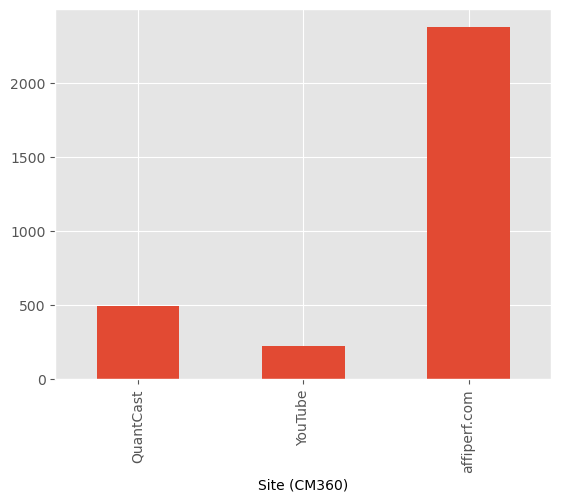

In [32]:
campaign_df_cleaned_site['Total Conversions'].plot(kind='bar') #plot the total conversions by site, now with youtube separate
plt.show()